In [1]:
using DSP,WAV
using PyCall
using Plots,PyPlot
using PaddedViews
using MFCC
using FFTW
using MLLabelUtils
using Flux
using Printf,BSON
using Flux: onehotbatch, onecold, crossentropy, throttle, Conv,relu
using Base.Iterators: repeated, partition
using StatsBase
using MLLabelUtils,MLDataPattern
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
IpY = pyimport("IPython")
using Images


┌ Info: CUDAdrv.jl failed to initialize, GPU functionality unavailable (set JULIA_CUDA_SILENT or JULIA_CUDA_VERBOSE to silence or expand this message)
└ @ CUDAdrv /home/blackforest/.julia/packages/CUDAdrv/mCr0O/src/CUDAdrv.jl:69


In [2]:
cd("./Downloads")

In [3]:
A = readdir("./Spoken_Digit/recordings")

2000-element Array{String,1}:
 "0_jackson_0.wav"  
 "0_jackson_1.wav"  
 "0_jackson_10.wav" 
 "0_jackson_11.wav" 
 "0_jackson_12.wav" 
 "0_jackson_13.wav" 
 "0_jackson_14.wav" 
 "0_jackson_15.wav" 
 "0_jackson_16.wav" 
 "0_jackson_17.wav" 
 "0_jackson_18.wav" 
 "0_jackson_19.wav" 
 "0_jackson_2.wav"  
 ⋮                  
 "9_yweweler_43.wav"
 "9_yweweler_44.wav"
 "9_yweweler_45.wav"
 "9_yweweler_46.wav"
 "9_yweweler_47.wav"
 "9_yweweler_48.wav"
 "9_yweweler_49.wav"
 "9_yweweler_5.wav" 
 "9_yweweler_6.wav" 
 "9_yweweler_7.wav" 
 "9_yweweler_8.wav" 
 "9_yweweler_9.wav" 

In [4]:
cd("./Spoken_Digit/recordings")

In [5]:
X = []
X_fs = []
Y = []
for i in 1:length(A)
    s,fs = wavread(A[i])
    push!(X,s)
    push!(X_fs,fs)
    push!(Y,Int(A[i][1]-'0'))
end
cd("../..")

In [6]:
min_length = 100000
ind = -1
for i in 1:length(X)
    if (length(X[i]))<min_length
        min_length = length(X[i])
        ind = i
    end
end

In [7]:
min_length,ind

(1148, 1374)

In [8]:
IpY = pyimport("IPython")

PyObject <module 'IPython' from '/home/blackforest/.julia/conda/3/lib/python3.7/site-packages/IPython/__init__.py'>

In [9]:
IpY.display.Audio(A[453])

PyObject <IPython.lib.display.Audio object>

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/html")}, ::PyObject) at PyCall.jl:895
└ @ PyCall /home/blackforest/.julia/packages/PyCall/ttONZ/src/PyCall.jl:895


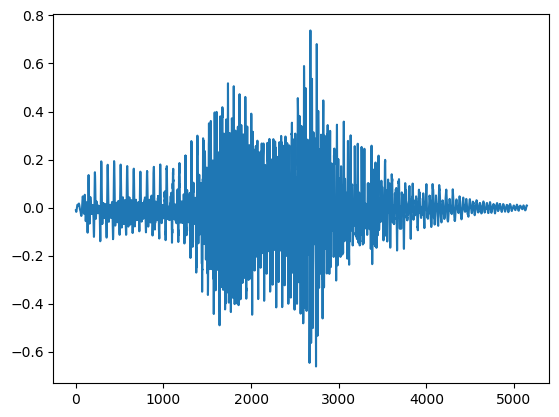

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f26c29c5910>

In [10]:
PyPlot.plot(X[1])

In [11]:
for i in 1:length(X)
    X[i] = Array(PaddedView(0,X[i],(10000,1)))
end

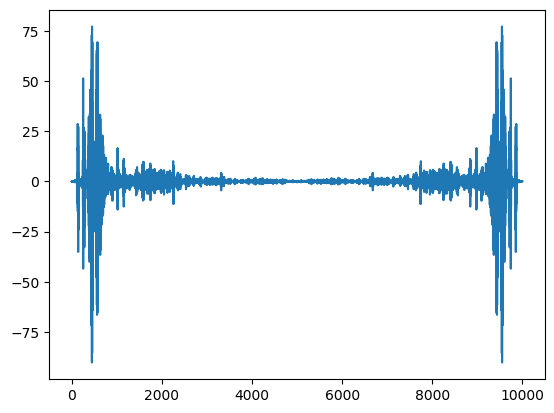

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba8e2490>

In [12]:
PyPlot.plot(fft(X[1]))

In [13]:
a = mfcc(X[1],X_fs[1],wintime=0.025, steptime=0.01, numcep=13, lifterexp=-22, sumpower=false, preemph=0.97, dither=false, minfreq=0.0, maxfreq=X_fs[1]/2, nbands=20, bwidth=1.0, dcttype=3, fbtype=:htkmel, usecmp=false, modelorder=0)

  likely near /home/blackforest/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /home/blackforest/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /home/blackforest/.julia/packages/IJulia/F1GUo/src/kernel.jl:52


([27.83713517465252 12.01115204691588 … -24.18656254153541 8.182072952586287; 32.61221243919097 12.92205015045903 … -31.69619940128106 14.132406061961113; … ; -Inf NaN … NaN NaN; -Inf NaN … NaN NaN], [5.315075481006131e-6 0.02769252548803683 … 0.42925255542842716 0.10110561565660199; 0.3050268357218074 0.42727719445766765 … 0.3103774878565957 0.013319058465406436; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Dict{String,Any}("wintime" => 0.025,"dither" => false,"nbands" => 20,"sr" => 8000.0f0,"lifterexp" => -22,"minfreq" => 0.0,"steptime" => 0.01,"maxfreq" => 4000.0f0,"bwidth" => 1.0,"usecmp" => false…))

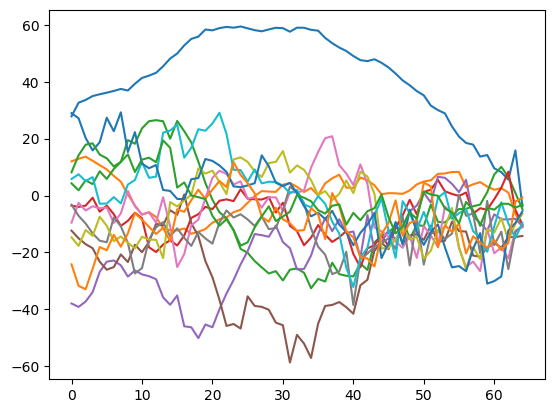

13-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860350>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860550>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860710>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba8608d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860a90>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860c50>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860e90>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba866090>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860a50>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba860c90>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba884c90>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba8666d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f26ba866890>

In [14]:
PyPlot.plot(a[1])

In [15]:
Y1 = periodogram(X[1][:,1])

DSP.Periodograms.Periodogram{Float64,AbstractFFTs.Frequencies{Float64}}([1.390813986765817e-7, 1.417491834812411e-7, 5.56363942356834e-7, 1.494433053075922e-7, 7.350423522384024e-7, 2.9128864184856383e-9, 4.4343155353899186e-7, 1.0788490082115056e-7, 1.06281900671088e-7, 1.2577569034461783e-7  …  7.634703036518329e-7, 2.1174131096668405e-6, 2.349575456367314e-6, 3.0239377946409147e-6, 7.5070013558519e-6, 1.2554359378805342e-5, 1.1518345191614688e-5, 7.114390233211731e-6, 1.932633765896922e-5, 1.723692866239693e-5], [0.0, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001  …  0.49910000000000004, 0.49920000000000003, 0.4993, 0.4994, 0.4995, 0.49960000000000004, 0.49970000000000003, 0.4998, 0.4999, 0.5])

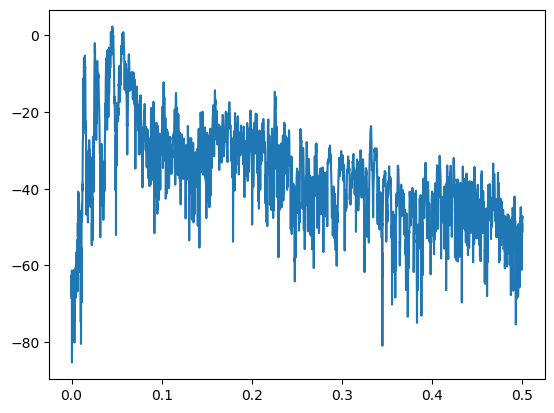

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f26cff6c510>

In [16]:
PyPlot.plot(Y1.freq, DSP.pow2db.(Y1.power))

In [17]:
fieldnames(typeof(Y1))

(:power, :freq)

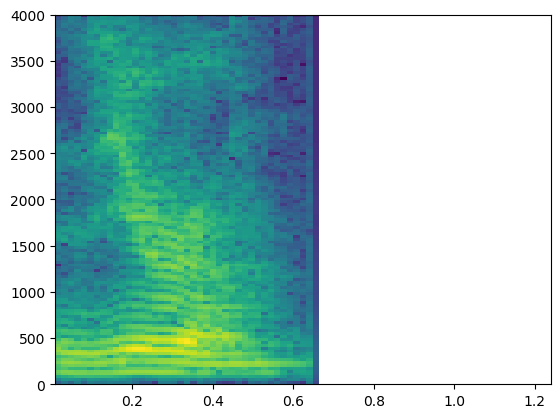

([5.921396503211639e-11 6.144594757755415e-10 … 0.0 0.0; 1.8568523198236493e-9 1.0536784714698365e-8 … 0.0 0.0; … ; 1.9158576126187585e-11 1.5013662229371582e-10 … 0.0 0.0; 4.380290940223674e-12 6.62498304638197e-11 … 0.0 0.0], [0.0, 31.25, 62.5, 93.75, 125.0, 156.25, 187.5, 218.75, 250.0, 281.25  …  3718.75, 3750.0, 3781.25, 3812.5, 3843.75, 3875.0, 3906.25, 3937.5, 3968.75, 4000.0], [0.016, 0.032, 0.048, 0.064, 0.08, 0.096, 0.112, 0.128, 0.144, 0.16  …  1.088, 1.104, 1.12, 1.136, 1.152, 1.168, 1.184, 1.2, 1.216, 1.232], PyObject <matplotlib.image.AxesImage object at 0x7f73707fd5d0>)

In [18]:
c = PyPlot.specgram(X[1][:,1],Fs = X_fs[1])

In [18]:
a,f = wavread(A[1])

([-0.011261329996642965; -0.01315347758415479; … ; 0.00988799707022309; 0.009277626880703146], 8000.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x01, 0x00, 0x40, 0x1f, 0x00, 0x00, 0x80, 0x3e, 0x00, 0x00, 0x02, 0x00, 0x10, 0x00])])

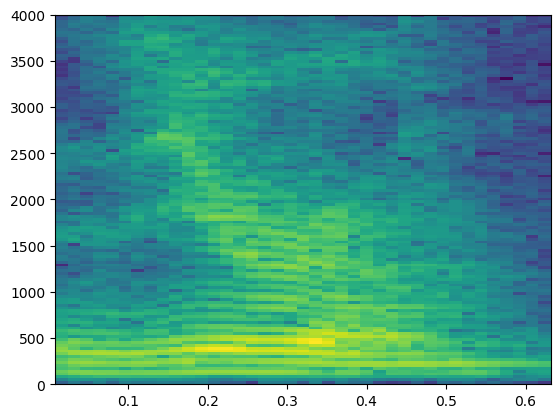

([5.921396503211639e-11 6.144594757755415e-10 … 8.451382701637563e-12 1.756504456288814e-12; 1.8568523198236493e-9 1.0536784714698365e-8 … 2.8469931152361586e-9 5.448721894513743e-10; … ; 1.9158576126187585e-11 1.5013662229371582e-10 … 5.123048834666636e-12 1.0419974773609225e-11; 4.380290940223674e-12 6.62498304638197e-11 … 7.044207901278974e-13 1.4417284840034432e-12], [0.0, 31.25, 62.5, 93.75, 125.0, 156.25, 187.5, 218.75, 250.0, 281.25  …  3718.75, 3750.0, 3781.25, 3812.5, 3843.75, 3875.0, 3906.25, 3937.5, 3968.75, 4000.0], [0.016, 0.032, 0.048, 0.064, 0.08, 0.096, 0.112, 0.128, 0.144, 0.16  …  0.48, 0.496, 0.512, 0.528, 0.544, 0.56, 0.576, 0.592, 0.608, 0.624], PyObject <matplotlib.image.AxesImage object at 0x7f26d6fefb50>)

In [19]:
PyPlot.specgram(a[:,1],Fs = f)

In [20]:
Y1_spec = spectrogram(X[1][:,1])

DSP.Periodograms.Spectrogram{Float64,AbstractFFTs.Frequencies{Float64}}([0.00010157920214628151 0.0022790057348467726 … 0.0 0.0; 0.0002085672034185668 0.004464072505596499 … 0.0 0.0; … ; 0.00012052420155104223 1.364858547317277e-5 … 0.0 0.0; 0.00016639885841792997 7.310138149097189e-5 … 0.0 0.0], [0.0, 0.0008, 0.0016, 0.0024000000000000002, 0.0032, 0.004, 0.0048000000000000004, 0.0056, 0.0064, 0.007200000000000001  …  0.4928, 0.49360000000000004, 0.4944, 0.49520000000000003, 0.496, 0.4968, 0.49760000000000004, 0.4984, 0.49920000000000003, 0.5], 625.0:625.0:9375.0)

In [21]:
fieldnames(typeof(Y1_spec))

(:power, :freq, :time)

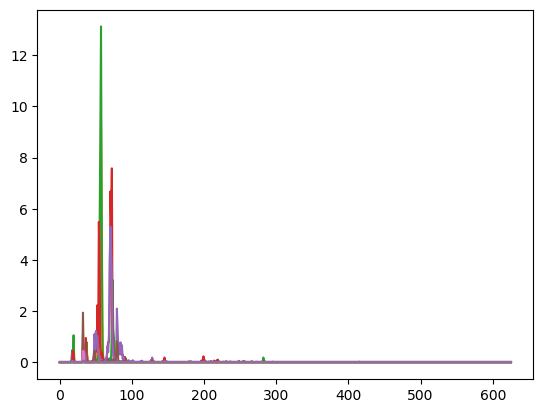

15-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfe95b10>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfe95d10>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfe95ed0>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea10d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1290>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1450>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1690>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1850>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1a10>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1490>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfed9390>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea1e90>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea4090>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea4250>
 PyObject <matplotlib.lines.Line2D object at 0x7f26cfea4410>

In [22]:
PyPlot.plot(Array(Y1_spec.power))

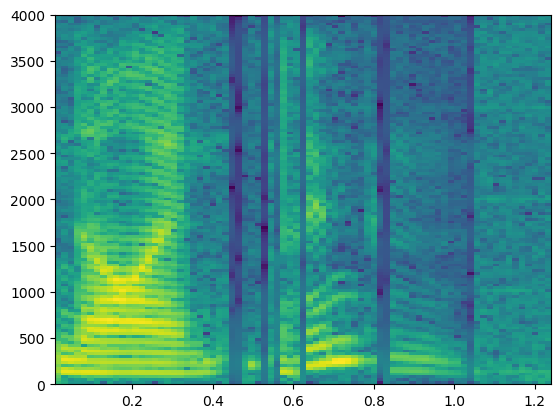

In [23]:
imgs = []
for i in 1:length(X)
    b = PyPlot.specgram(X[i][:,1],Fs = X_fs[i])
    push!(imgs,b[1])
end

In [24]:
labels = Y;

In [25]:
imgs_,labels_ = shuffleobs((imgs,labels));

In [27]:
for i in 1:length(imgs)
    imgs[i] = Flux.normalise(imgs[i],dims=2)
end

In [69]:
(train_X, train_Y), (test_X, test_Y) = splitobs((imgs_, labels_); at = 0.85);

In [70]:
function make_minibatch(X,Y,idxs)
    X_batch = Array{Float32}(undef,(img_size)..., 1, length(idxs))
    for i in 1:length(idxs)
        img = Float32.(imresize((X[idxs[i]]),(img_size)...))
        X_batch[:, :, :, i] = img
    end
    Y_batch = onehotbatch(Y[idxs], 0:9)
    return (X_batch, Y_batch)
end

make_minibatch (generic function with 1 method)

In [71]:
mb_indices = [] 
batch_size = 32
img_size = (128,64)
for i in range(1,length(train_Y)-1,step = batch_size)
    idxs = []
    for j in i:i+batch_size-1
        push!(idxs,j)
    end
    push!(mb_indices,idxs)
end
train_set = [make_minibatch(train_X,train_Y,mb_indices[i]) for i in 1:(size(mb_indices)[1]-1)];

In [72]:
size(train_set[1][1])

(128, 64, 1, 32)

In [73]:
@info("Constructing model...")
model = Chain(
    # First convolution, operating upon a 128*64 image
    Conv((3, 3), 1=>64, pad=(1,1), relu),
    MaxPool((2,2)),
    BatchNorm(64,relu),

    # Second convolution, operating upon a 64*32 image
    Conv((3, 3), 64=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    BatchNorm(32,relu),
    Dropout(0.15),
    
    # Reshape 3d tensor into a 2d one, at this point it should be (32,16,32, N)
    # which is where we get the 2048 in the `Dense` layer below:
    x -> reshape(x, :, size(x, 4)),
    Dense(32*16*32, 128,relu),
    
    Dense(128,10),

    # Finally, softmax to get nice probabilities
    softmax,
)

┌ Info: Constructing model...
└ @ Main In[73]:1


Chain(Conv((3, 3), 1=>64, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), BatchNorm(64, λ = relu), Conv((3, 3), 64=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), BatchNorm(32, λ = relu), Dropout(0.15), #21, Dense(16384, 128, relu), Dense(128, 10), softmax)

In [74]:
function loss(x, y)
    # We augment `x` a little bit here, adding in random noise
    x_aug = x .+ 0.1f0*(randn(eltype(x), size(x)))

    y_hat = model(x_aug)
    return crossentropy(y_hat, y)
end
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy (generic function with 1 method)

In [75]:
batch_size=300
img_size = (128,64)
ind = []
for i in 1701:2000
    push!(ind,i)
end
test_set = [make_minibatch(imgs_,labels_,ind)];

In [67]:
accuracy(test_set[1]...)

0.12666666666666668

In [76]:
opt = ADAM(0.001)

@info("Beginning training loop...")
best_acc = 0.0
last_improvement = 0
for epoch_idx in 1:20
    global best_acc, last_improvement
    # Train for a single epoch
    Flux.train!(loss, params(model), train_set, opt)
    x,y = train_set[1] 
print(loss(x,y))
    
    # Calculate accuracy:
    acc = accuracy(test_set[1]...)
    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch_idx, acc))

    # If our accuracy is good enough, quit out.
    if acc >= 0.95
        @info(" -> Early-exiting: We reached our target accuracy of 95.0%")
        break
    end

    # If this is the best accuracy we've seen so far, save the model out
    if acc >= best_acc
        @info(" -> New best accuracy! Saving model out to MNIST_Speech.bson") #Here, model is saved as MNIST_Speech.bson        BSON.@save joinpath(dirname(@__FILE__), "MNIST_Speech.bson") model epoch_idx acc
        best_acc = acc
        last_improvement = epoch_idx
    end

    # If we haven't seen improvement in 5 epochs, drop our learning rate:
    if epoch_idx - last_improvement >= 5 && opt.eta > 1e-4
        opt.eta /= 10.0
        @warn(" -> Haven't improved in a while, dropping learning rate to $(opt.eta)!")

        # After dropping learning rate, give it a few epochs to improve
        last_improvement = epoch_idx
    end

    if epoch_idx - last_improvement >= 10
        @warn(" -> We're calling this converged.")
        break
    end
end

┌ Info: Beginning training loop...
└ @ Main In[76]:3


0.9193725

┌ Info: [1]: Test accuracy: 0.7433
└ @ Main In[76]:15
┌ Info:  -> New best accuracy! Saving model out to MNIST_Speech.bson
└ @ Main In[76]:25


0.2221924

┌ Info: [2]: Test accuracy: 0.8667
└ @ Main In[76]:15
┌ Info:  -> New best accuracy! Saving model out to MNIST_Speech.bson
└ @ Main In[76]:25


0.08457922

┌ Info: [3]: Test accuracy: 0.9100
└ @ Main In[76]:15
┌ Info:  -> New best accuracy! Saving model out to MNIST_Speech.bson
└ @ Main In[76]:25


0.025241835

┌ Info: [4]: Test accuracy: 0.8967
└ @ Main In[76]:15


0.012152372

┌ Info: [5]: Test accuracy: 0.8900
└ @ Main In[76]:15


0.009785816

┌ Info: [6]: Test accuracy: 0.9000
└ @ Main In[76]:15


0.0048145875

┌ Info: [7]: Test accuracy: 0.9033
└ @ Main In[76]:15


0.0033725547

┌ Info: [8]: Test accuracy: 0.9167
└ @ Main In[76]:15
┌ Info:  -> New best accuracy! Saving model out to MNIST_Speech.bson
└ @ Main In[76]:25


0.0028968179

┌ Info: [9]: Test accuracy: 0.9200
└ @ Main In[76]:15
┌ Info:  -> New best accuracy! Saving model out to MNIST_Speech.bson
└ @ Main In[76]:25


0.0026853126

┌ Info: [10]: Test accuracy: 0.9067
└ @ Main In[76]:15


0.0027050925

┌ Info: [11]: Test accuracy: 0.9167
└ @ Main In[76]:15


0.0016052626

┌ Info: [12]: Test accuracy: 0.9167
└ @ Main In[76]:15


0.0013172618

┌ Info: [13]: Test accuracy: 0.9233
└ @ Main In[76]:15
┌ Info:  -> New best accuracy! Saving model out to MNIST_Speech.bson
└ @ Main In[76]:25


0.001128634

┌ Info: [14]: Test accuracy: 0.9167
└ @ Main In[76]:15


0.0012455529

┌ Info: [15]: Test accuracy: 0.9167
└ @ Main In[76]:15


0.0006524735

┌ Info: [16]: Test accuracy: 0.9100
└ @ Main In[76]:15


0.0007647889

┌ Info: [17]: Test accuracy: 0.9100
└ @ Main In[76]:15


0.00041593268

┌ Info: [18]: Test accuracy: 0.9133
└ @ Main In[76]:15
┌ Warning:  -> Haven't improved in a while, dropping learning rate to 0.0001!
└ @ Main In[76]:34


0.0005043676

┌ Info: [19]: Test accuracy: 0.9133
└ @ Main In[76]:15


0.0005338798

┌ Info: [20]: Test accuracy: 0.9133
└ @ Main In[76]:15


In [80]:
BSON.@load "MNIST_Speech.bson" model

In [81]:
accuracy(test_set[1]...)

0.9233333333333333